In [164]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput,weights) > 0):
            nCorrect += 1
    return 100 * nCorrect / N

def GetFMeasure(Inputs, targets, weights):
    truepos = 0
    falsepos = 0
    trueneg = 0
    falseneg = 0
    
    for n in range(len(targets)):
        OneInput = Inputs[n,:]
        if   targets[n] > 0 and np.dot(OneInput,weights) > 0:
            truepos += 1
        elif targets[n] < 0 and np.dot(OneInput,weights) > 0:
            falsepos+= 1
        elif targets[n] < 0 and np.dot(OneInput,weights) < 0:
            trueneg += 1
        else:
            falseneg+= 1
    
    precision = float(truepos) / float(truepos+falsepos)
    recall = float(truepos) / float(truepos+falseneg)
    return 2 * (precision*recall) / (precision+recall)

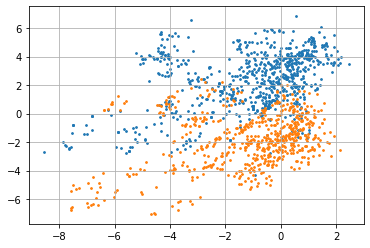

In [182]:
NumDataPerClass = 200

Y1 = []
Y2 = []
f = []
with open(r"C:\Users\Supritha Konaje\Acrene_TwoClassClassification_UCI_Lab2\data_banknote_authentication.txt") as fp:
    for line in fp:
        linedata = [float(i) for i in line.split(',')]
        if linedata[4] == 0:
            Y1.append(linedata[:4])
            f.append(1)
        else:
            Y2.append(linedata[:4])
            f.append(-1)
L = len(f)

Y = np.concatenate((Y1,Y2))
Y = np.append(Y, np.ones((L,1)), axis=1) # Add another dimension filled with ones


plt.scatter([i[3] for i in Y1], [i[0] for i in Y1],s=3)
plt.scatter([i[3] for i in Y2], [i[0] for i in Y2],s=3)
plt.grid(True)

# ax = plt.subplot(111)
# ax.spines["right"].set_visible(False)
# ax.spines["top"].set_visible(False)

plt.savefig("DorotheaClass.png")


In [183]:
rIndex = np.random.permutation(L)

Yr = Y[rIndex,]
fr = np.array(f)[rIndex]

# Training and test sets (50/50)
Y_train = Yr[0:math.floor(L/2)]
f_train = fr[0:math.floor(L/2)]
Y_test  = Yr[math.floor(L/2):L]
f_test  = fr[math.floor(L/2):L]

print(Y_train.shape,f_train.shape,Y_test.shape,f_test.shape)

Ntrain, Ntest = NumDataPerClass, NumDataPerClass

(686, 5) (686,) (686, 5) (686,)


In [184]:
# Random initialisation of weights
a = np.random.randn(5)
print(a)

# Check performance with initial random weights
print("Percentage correct before training:", PercentCorrect(Y_train,f_train,a))
print("F-measure before training:", GetFMeasure(Y,f,a))

# Number of iterations & learning rate
MaxIter = 2000
alpha   = 0.01

# Space for plots
P_train = np.zeros(MaxIter)
P_test  = np.zeros(MaxIter)
f_train = np.zeros(MaxIter)
f_test  = np.zeros(MaxIter)
fmeasure = np.zeros(MaxIter)

#_______ MAIN LOOP ________#
for iter in range(MaxIter):
    # Select a random data point
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    y = Y_train[r,:]
    
    # If misclassified, then update the weights
    if (f_train[r] * np.dot(y,a) < 0):
        a += alpha * f_train[r] * y
        
        
    # Evaluate trianing and test performances for plotting
    P_train[iter] = PercentCorrect(Y_train,f_train,a)
    P_test[iter]  = PercentCorrect(Y_test, f_test, a)
    f_train[iter] = GetFMeasure(Y_train,f_train,a)
    f_test[iter]  = GetFMeasure(Y_test, f_test, a)
    fmeasure[iter] = GetFMeasure(Y,f,a)

print("Percentage correct after training: ", PercentCorrect(Y_train,f_train,a),PercentCorrect(Y_test,f_test,a))
print("F-measure after training:",GetFMeasure(Y,f,a))

[2.87648263 0.8316113  0.72214783 0.83102016 0.74588673]
Percentage correct before training: 92.4198250728863
F-measure before training: 0.9256926952141058


IndexError: index 686 is out of bounds for axis 0 with size 686

[2.87648263 0.8316113  0.72214783 0.83102016 0.74588673]


<ipython-input-185-531aee00d162>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


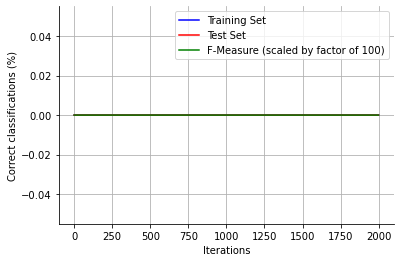

In [185]:
plt.plot(range(MaxIter), P_train, "b", range(MaxIter),P_test,"r",[100*i for i in fmeasure],"g")
plt.grid(True)
plt.gca().legend(("Training Set","Test Set", "F-Measure (scaled by factor of 100)"))
plt.xlabel("Iterations")
plt.ylabel("Correct classifications (%)")
print(a)

ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("lab2-prob3-training.svg", format="svg")

<ipython-input-187-34d218a78b90>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


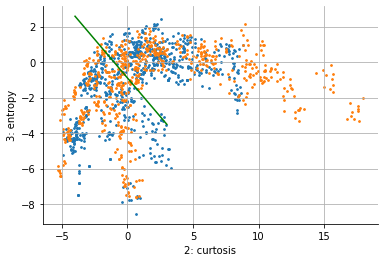

In [187]:
plt.scatter([i[2] for i in Y1], [i[3] for i in Y1],s=3)
plt.scatter([i[2] for i in Y2], [i[3] for i in Y2],s=3)
plt.grid(True)

x=np.linspace(-4,3)
plt.plot(x, -(a[2]*x+a[4])/a[3], c="g") # Plot the separating line (x,y,1) dot (a0,a1,a2) = 0 = x*a0 + y*a1 + a2
# y = -(x*a0+a2)/a1

ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlabel("2: curtosis")
plt.ylabel("3: entropy")

plt.savefig("DorotheaClassificationResult.png")